In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('/kaggle/input/dry-eye-disease/Dry_Eye_Dataset.csv')

In [3]:
data.head(3)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N


In [4]:
data.isna().sum()

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

In [5]:
Categorical_columns = data.select_dtypes(include=['object', 'category']).columns

In [6]:
def mapping_to_num(data, column):
    mapping = {category: idx for idx, category in enumerate(data[column].astype('category').cat.categories)}
    data[column] = data[column].map(mapping)
    return data, mapping

In [7]:
mappings_dict = {}
columns_to_map = Categorical_columns
for col in columns_to_map:
    data, mapping = mapping_to_num(data, col)
    mappings_dict[col] = mapping

In [8]:
X = data.drop(columns=['Dry Eye Disease'])
y = data['Dry Eye Disease']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
gbm_model = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.01, max_depth=80, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.39      0.38      1986
           1       0.69      0.67      0.68      4014

    accuracy                           0.58      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.58      0.58      0.58      6000



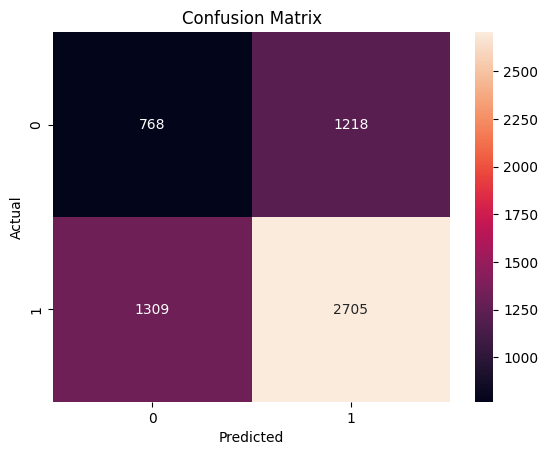

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()